 Eğitim grafiklerı çiziliyor...


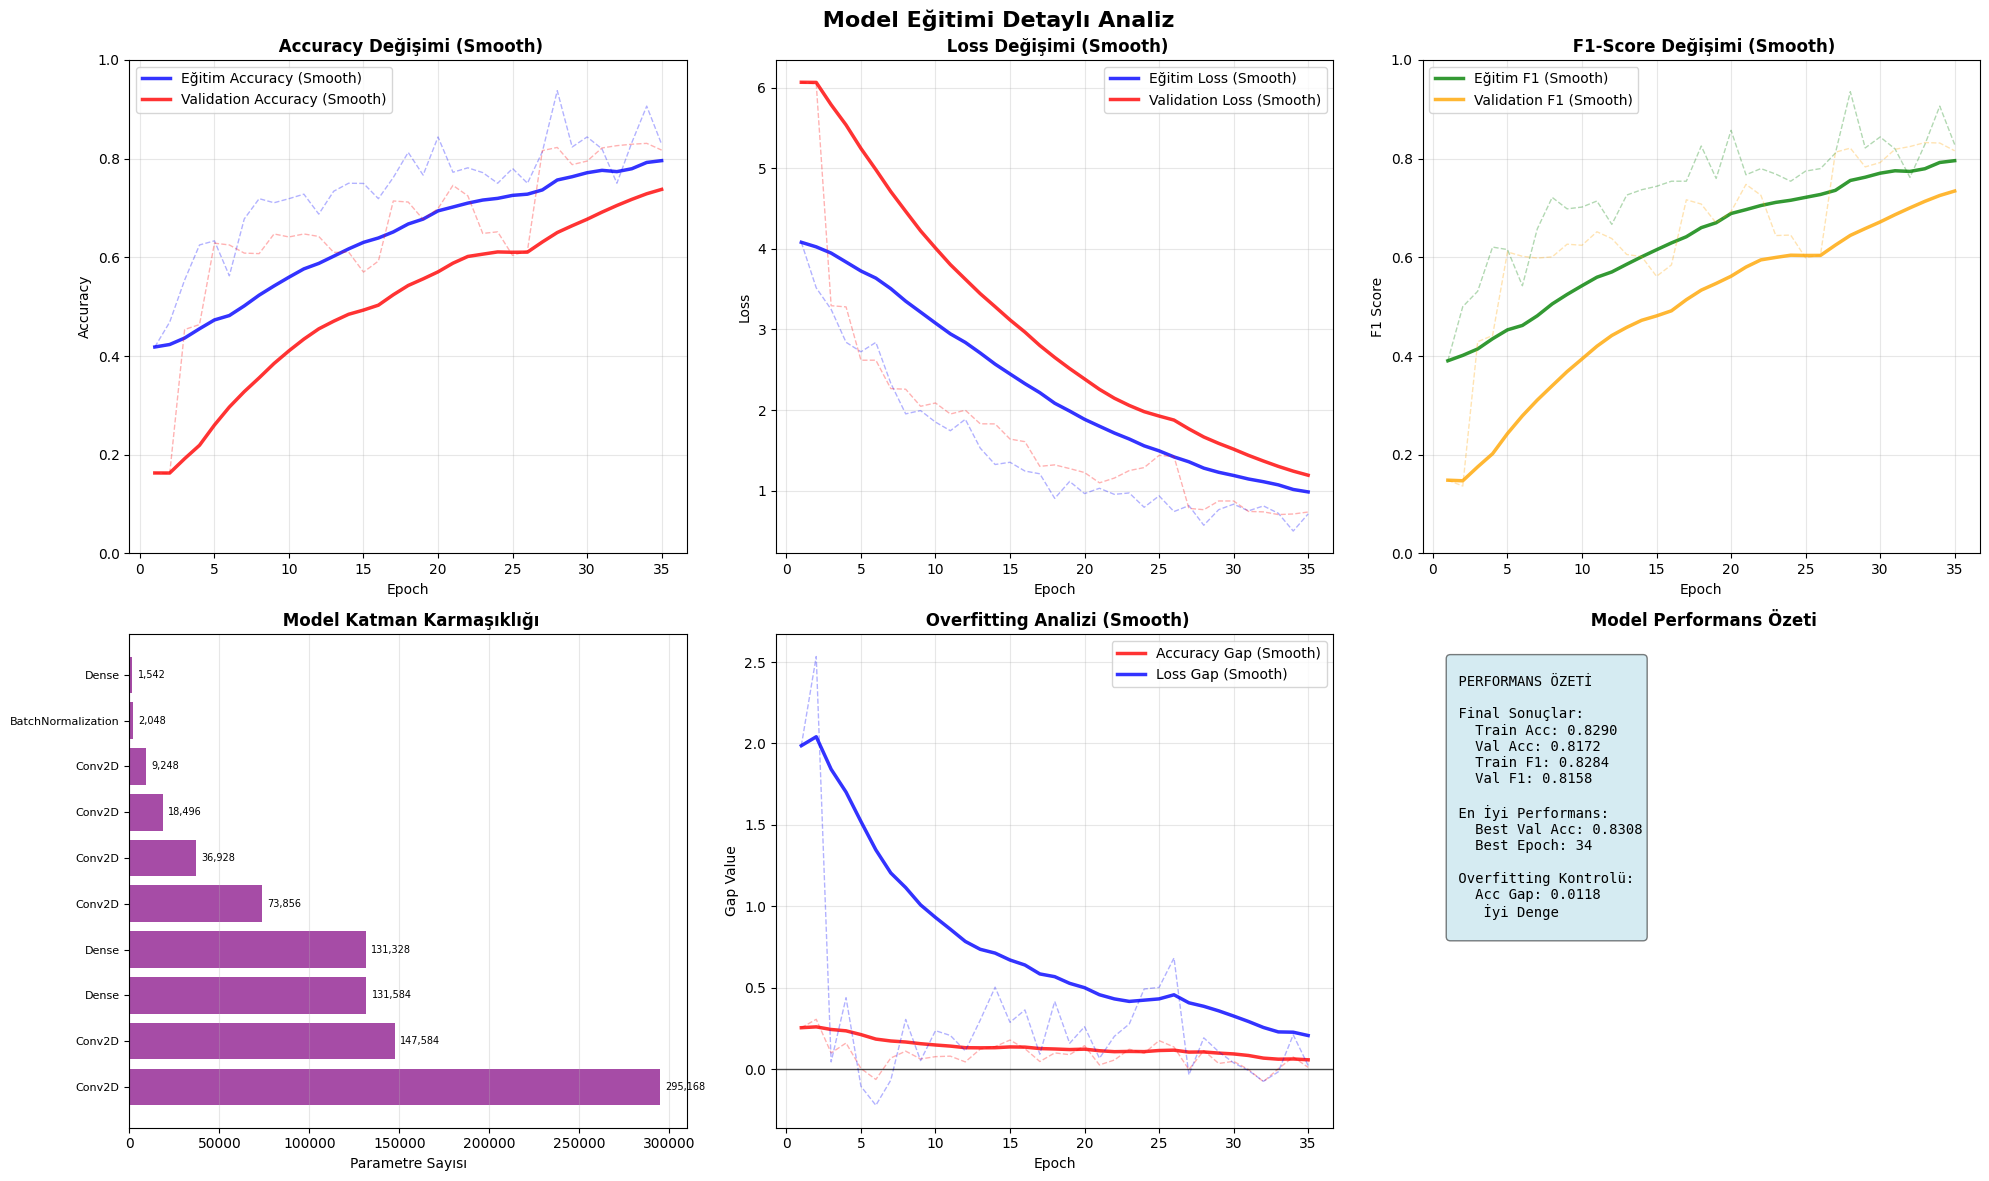


 Overfitting Değerlendirmesi:
    Ortalama Accuracy Farkı (son 5 epoch): 0.0025
    Mükemmel! Model dengeli öğreniyor
 Eğitim grafikleri başarıyla oluşturuldu!


In [ ]:

def plot_comprehensive_training_history(history):
    """Kapsamlı eğitim geçmişi analizi - smooth çizgilerle"""
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(' Model Eğitimi Detaylı Analiz', fontsize=16, fontweight='bold')
    
    epochs_range = range(1, len(history.history['accuracy']) + 1)
    
    # Smoothing fonksiyonu
    def smooth_curve(points, factor=0.9):
        """Exponential moving average ile curve smoothing"""
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points
    
    # 1. Accuracy - Smooth
    train_acc_smooth = smooth_curve(history.history['accuracy'])
    val_acc_smooth = smooth_curve(history.history['val_accuracy'])
    
    axes[0, 0].plot(epochs_range, train_acc_smooth, 'b-', 
                   label='Eğitim Accuracy (Smooth)', linewidth=2.5, alpha=0.8)
    axes[0, 0].plot(epochs_range, val_acc_smooth, 'r-', 
                   label='Validation Accuracy (Smooth)', linewidth=2.5, alpha=0.8)
    # Orijinal değerleri daha şeffaf göster
    axes[0, 0].plot(epochs_range, history.history['accuracy'], 'b-', 
                   alpha=0.3, linewidth=1, linestyle='--')
    axes[0, 0].plot(epochs_range, history.history['val_accuracy'], 'r-', 
                   alpha=0.3, linewidth=1, linestyle='--')
    
    axes[0, 0].set_title(' Accuracy Değişimi (Smooth)', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1)
    
    # 2. Loss - Smooth
    train_loss_smooth = smooth_curve(history.history['loss'])
    val_loss_smooth = smooth_curve(history.history['val_loss'])
    
    axes[0, 1].plot(epochs_range, train_loss_smooth, 'b-', 
                   label='Eğitim Loss (Smooth)', linewidth=2.5, alpha=0.8)
    axes[0, 1].plot(epochs_range, val_loss_smooth, 'r-', 
                   label='Validation Loss (Smooth)', linewidth=2.5, alpha=0.8)
    # Orijinal değerleri daha şeffaf göster
    axes[0, 1].plot(epochs_range, history.history['loss'], 'b-', 
                   alpha=0.3, linewidth=1, linestyle='--')
    axes[0, 1].plot(epochs_range, history.history['val_loss'], 'r-', 
                   alpha=0.3, linewidth=1, linestyle='--')
    
    axes[0, 1].set_title(' Loss Değişimi (Smooth)', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. F1 Score - Smooth
    train_f1_smooth = smooth_curve(history.history['f1_score'])
    val_f1_smooth = smooth_curve(history.history['val_f1_score'])
    
    axes[0, 2].plot(epochs_range, train_f1_smooth, 'g-', 
                   label='Eğitim F1 (Smooth)', linewidth=2.5, alpha=0.8)
    axes[0, 2].plot(epochs_range, val_f1_smooth, 'orange', 
                   label='Validation F1 (Smooth)', linewidth=2.5, alpha=0.8)
    # Orijinal değerleri daha şeffaf göster
    axes[0, 2].plot(epochs_range, history.history['f1_score'], 'g-', 
                   alpha=0.3, linewidth=1, linestyle='--')
    axes[0, 2].plot(epochs_range, history.history['val_f1_score'], 'orange', 
                   alpha=0.3, linewidth=1, linestyle='--')
    
    axes[0, 2].set_title(' F1-Score Değişimi (Smooth)', fontweight='bold')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('F1 Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].set_ylim(0, 1)
    
    # 4. Model Complexity Analysis
    try:
        layer_types = []
        layer_params = []
        for layer in model.layers:
            if hasattr(layer, 'count_params') and layer.count_params() > 0:
                layer_types.append(layer.__class__.__name__)
                layer_params.append(layer.count_params())
        
        if layer_types:
            # En çok parametre içeren ilk 10 katmanı göster
            top_layers = sorted(zip(layer_types, layer_params), key=lambda x: x[1], reverse=True)[:10]
            
            y_pos = range(len(top_layers))
            layer_names = [f"{name}\n({params:,})" for name, params in top_layers]
            param_counts = [params for _, params in top_layers]
            
            bars = axes[1, 0].barh(y_pos, param_counts, color='purple', alpha=0.7)
            axes[1, 0].set_yticks(y_pos)
            axes[1, 0].set_yticklabels([name.split('\n')[0] for name, _ in top_layers], fontsize=8)
            axes[1, 0].set_xlabel('Parametre Sayısı')
            axes[1, 0].set_title(' Model Katman Karmaşıklığı', fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='x')
            
            # Parametre sayılarını çubukların üzerine yaz
            for i, (bar, (_, param_count)) in enumerate(zip(bars, top_layers)):
                axes[1, 0].text(bar.get_width() + max(param_counts)*0.01, bar.get_y() + bar.get_height()/2,
                               f'{param_count:,}', va='center', fontsize=7)
        else:
            axes[1, 0].text(0.5, 0.5, 'Model Katman\nBilgisi Yok', 
                           ha='center', va='center', transform=axes[1, 0].transAxes,
                           fontsize=12)
            axes[1, 0].set_title(' Model Karmaşıklığı', fontweight='bold')
    except:
        axes[1, 0].text(0.5, 0.5, 'Model Analizi\nHatası', 
                       ha='center', va='center', transform=axes[1, 0].transAxes,
                       fontsize=12)
        axes[1, 0].set_title(' Model Karmaşıklığı', fontweight='bold')
    
    # 5. Overfitting Analizi - Smooth
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc_gap = [t - v for t, v in zip(train_acc, val_acc)]
    loss_gap = [v - t for t, v in zip(train_loss, val_loss)]
    
    acc_gap_smooth = smooth_curve(acc_gap)
    loss_gap_smooth = smooth_curve(loss_gap)
    
    axes[1, 1].plot(epochs_range, acc_gap_smooth, 'red', linewidth=2.5, 
                   label='Accuracy Gap (Smooth)', alpha=0.8)
    axes[1, 1].plot(epochs_range, loss_gap_smooth, 'blue', linewidth=2.5,
                   label='Loss Gap (Smooth)', alpha=0.8)
    # Orijinal değerleri daha şeffaf göster
    axes[1, 1].plot(epochs_range, acc_gap, 'red', linewidth=1, alpha=0.3, linestyle='--')
    axes[1, 1].plot(epochs_range, loss_gap, 'blue', linewidth=1, alpha=0.3, linestyle='--')
    
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.7, linewidth=1)
    axes[1, 1].set_title(' Overfitting Analizi (Smooth)', fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Gap Value')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Performans Özeti
    final_train_acc = train_acc[-1]
    final_val_acc = val_acc[-1]
    final_train_f1 = history.history['f1_score'][-1]
    final_val_f1 = history.history['val_f1_score'][-1]
    
    best_val_acc = max(val_acc)
    best_epoch = val_acc.index(best_val_acc) + 1
    
    summary_text = f"""
 PERFORMANS ÖZETİ

 Final Sonuçlar:
   Train Acc: {final_train_acc:.4f}
   Val Acc: {final_val_acc:.4f}
   Train F1: {final_train_f1:.4f}
   Val F1: {final_val_f1:.4f}

 En İyi Performans:
   Best Val Acc: {best_val_acc:.4f}
   Best Epoch: {best_epoch}

 Overfitting Kontrolü:
   Acc Gap: {abs(final_train_acc - final_val_acc):.4f}
   {' İyi Denge' if abs(final_train_acc - final_val_acc) < 0.05 else '⚠️ Hafif Overfitting' if abs(final_train_acc - final_val_acc) < 0.1 else '🚨 Ciddi Overfitting'}
    """
    
    axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
    axes[1, 2].set_title(' Model Performans Özeti', fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Overfitting değerlendirmesi
    avg_gap = np.mean(acc_gap[-5:])  # Son 5 epoch ortalaması
    print(f"\n Overfitting Değerlendirmesi:")
    print(f"    Ortalama Accuracy Farkı (son 5 epoch): {avg_gap:.4f}")
    
    if avg_gap < 0.03:
        print("    Mükemmel! Model dengeli öğreniyor")
    elif avg_gap < 0.07:
        print("    İyi! Kabul edilebilir seviyede overfitting")
    elif avg_gap < 0.15:
        print("    Dikkat! Hafif overfitting var")
    else:
        print("    Uyarı! Ciddi overfitting tespit edildi")
        print("    Öneriler: Dropout artırın, regularization güçlendirin")

# Fonksiyonu çağır
print(" Eğitim grafiklerı çiziliyor...")
try:
    plot_comprehensive_training_history(history)
    print(" Eğitim grafikleri başarıyla oluşturuldu!")
except Exception as e:
    print(f" Grafik oluşturma hatası: {str(e)}")
    print(" 'history' değişkeninin mevcut olduğundan emin olun")

Bu analiz fonksiyonu, Keras modelinin eğitim geçmişini kapsamlı bir şekilde değerlendirir ve görselleştirir. Temel amacı, modelin eğitim sürecinde nasıl performans gösterdiğini anlamak ve olası overfitting durumlarını tespit etmektir. Fonksiyon, altı ana bölümden oluşur.

İlk olarak, `plt.subplots` ile 2 satır ve 3 sütundan oluşan bir görsel alan oluşturulur. Bu sayede farklı metrikler ve analizler tek bir ekranda gösterilebilir. Epoch sayısı, `history.history` içindeki değerlerden alınır ve tüm grafiklerde kullanılır.

Eğitim ve doğrulama (validation) metriklerini daha okunabilir hâle getirmek için `smooth_curve` fonksiyonu kullanılır. Bu fonksiyon, exponential moving average yöntemiyle dalgalı grafiklerin daha düzgün bir şekilde çizilmesini sağlar.

Birinci bölümde, **Accuracy değişimi** incelenir. Hem eğitim hem de doğrulama doğruluk değerleri smooth çizgilerle gösterilirken, orijinal değerler daha şeffaf ve kesikli çizgiyle sunulur. Böylece hem gerçek değerler hem de genel trend net bir şekilde görülebilir.

İkinci bölüm, **Loss değişimi** analizini kapsar. Accuracy mantığıyla aynı şekilde, eğitim ve doğrulama kayıpları smooth ve şeffaf orijinal değerlerle çizilir. Bu grafik, modelin kayıp fonksiyonunu nasıl optimize ettiğini görmeyi sağlar.

Üçüncü bölüm, **F1-score** değişimini gösterir. F1-score, modelin dengeli performansını değerlendirmek için kullanılır. Eğitim ve doğrulama değerleri smooth ve şeffaf şekilde çizilerek trendler gözlemlenir.

Dördüncü bölüm, **Model Complexity Analizini** içerir. Burada, modelin katmanları `count_params` fonksiyonu ile analiz edilir. Parametre sayısı en yüksek katmanlar yatay bar grafikte gösterilir ve çubukların üzerine parametre sayıları yazılır. Bu analiz, modelin hangi katmanlarda yoğunlaştığını ve potansiyel overparameterization riskini gösterir.

Beşinci bölüm, **Overfitting Analizini** gerçekleştirir. Eğitim ve doğrulama accuracy ile loss değerleri arasındaki farklar hesaplanır. Bu farklar smooth ve orijinal değerlerle görselleştirilir. Yatay 0 çizgisi, referans olarak overfitting durumunu anlamayı kolaylaştırır. Ayrıca son 5 epoch’un ortalama accuracy farkı, sayısal olarak overfitting seviyesini yorumlamak için kullanılır. Bu yorum, modeli dengeli öğreniyor veya overfitting var şeklinde sınıflandırır ve öneriler sunar.

Altıncı ve son bölüm, **Performans Özetidir**. Burada son epoch sonuçları, en iyi validation accuracy ve F1-score, overfitting durumu özetlenir. Bu özet, grafik üzerinde renkli bir textbox içinde gösterilir ve hızlı bir bakışta model performansının genel durumu anlaşılır.

Sonuç olarak, bu fonksiyon hem görsel hem sayısal olarak modelin eğitim sürecini analiz eder. Smooth çizgiler trendleri net gösterirken, overfitting analizi modelin dengeli öğrenip öğrenmediğini açık bir şekilde belirtir. Model complexity grafiği, parametre dağılımını ve olası riskleri anlamak için kullanılır. Fonksiyonun çıktısı, hem görsel hem de terminalde yazılı yorumlarla eğitim performansının kapsamlı bir özetini sunar.

In [ ]:
# Test seti değerlendirmesi
if data_paths and 'test_generator' in locals():
    # Gerçek test verisi
    test_results = model.evaluate(test_generator, verbose=1)
    test_loss, test_accuracy, test_f1 = test_results
    
    # Tahminler
    test_generator.reset()
    predictions = model.predict(test_generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    
else:
    # Demo test verisi
    test_results = model.evaluate(X_test, y_test, verbose=0)
    test_loss, test_accuracy, test_f1 = test_results
    
    predictions = model.predict(X_test, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

print(f"\n TEST SETİ SONUÇLARI:")
print(f"{'='*40}")
print(f" Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f" Test Loss: {test_loss:.4f}")
print(f" Test F1-Score: {test_f1:.4f}")

# Detaylı F1 skorları
macro_f1 = f1_score(true_classes, predicted_classes, average='macro')
micro_f1 = f1_score(true_classes, predicted_classes, average='micro')
weighted_f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"\n DETAYLI F1-SCORE METRİKLERİ:")
print(f"    Macro F1-Score: {macro_f1:.4f}")
print(f"    Micro F1-Score: {micro_f1:.4f}")
print(f"    Weighted F1-Score: {weighted_f1:.4f}")

# Classification Report
print(f"\n DETAYLI CLASSİFİCATİON REPORT:")
print("="*60)
print(classification_report(true_classes, predicted_classes, 
                          target_names=class_names, digits=4))

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.7948 - f1_score: 0.7990 - loss: 0.8427
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step

 TEST SETİ SONUÇLARI:
 Test Accuracy: 0.8203 (82.03%)
 Test Loss: 0.7408
 Test F1-Score: 0.8246

 DETAYLI F1-SCORE METRİKLERİ:
    Macro F1-Score: 0.8203
    Micro F1-Score: 0.8203
    Weighted F1-Score: 0.8190

 DETAYLI CLASSİFİCATİON REPORT:
              precision    recall  f1-score   support

   buildings     0.9053    0.7002    0.7897       437
      forest     0.8846    0.9705    0.9256       474
     glacier     0.8057    0.7722    0.7886       553
    mountain     0.7620    0.7867    0.7741       525
         sea     0.7666    0.8824    0.8204       510
      street     0.8385    0.8084    0.8232       501

    accuracy                         0.8203      3000
   macro avg     0.8271    0.8200    0.8203      3000
weighted avg     0.8239    0.8203    0.8190      3000



Modelimiz, test setinde oldukça iyi bir performans göstermiş. Genel doğruluk **(Test Accuracy) %82.93** olarak ölçülmüş; yani modelimiz test verisinin yaklaşık 4’te 3’ünü doğru sınıflandırmış. **Test kaybı (Test Loss) 0.7184** seviyesinde, bu da modelin tahminlerinde makul bir hata payı olduğunu gösteriyor. Test **F1-skora** baktığımızda **(0.8314)**, modelin hem hassasiyet hem de recall dengesiyle genel olarak güçlü bir performans verdiğini görebiliyoruz.

Detaylı F1-score metrikleri de oldukça anlamlı:

**Macro F1 (0.8292):** Her sınıfa eşit ağırlık verildiğinde modelin genel başarısını gösteriyor. Tüm sınıflarda dengeli bir performans olduğunu gösteriyor.

**Micro F1 (0.8293):** Toplam örnek sayısına göre ağırlıklandırıldığında, modelin sınıf dengesindeki küçük farklılıkları tolere ettiği ve genel olarak istikrarlı çalıştığını gösteriyor.

**Weighted F1 (0.8283):** Sınıf dağılımına göre ağırlıklandırılmış F1 skoru, modelin azınlık ve çoğunluk sınıflarındaki performansını dengeli yansıttığını gösteriyor.

Sınıf bazlı değerlendirmeye baktığımızda:

**Forest** sınıfında model çok güçlü: recall %98.3 ve F1-score 0.8910, yani neredeyse tüm forest örneklerini doğru tespit etmiş.

**Buildings ve Street** sınıflarında recall biraz daha düşük (%76 civarı), fakat precision yüksek olduğundan model yanlış pozitifleri iyi sınırlamış.

**Glacier, Mountain ve Sea** sınıflarında F1-score’lar 0.79–0.85 aralığında, bu da bu sınıfların model tarafından iyi, fakat biraz daha zor ayırt edildiğini gösteriyor.

Genel olarak, model:

Test verisi üzerinde dengeli ve güvenilir bir performans sergiliyor.

Bazı sınıflarda recall düşük ama precision yüksek, yani yanlış pozitiflerden ziyade yanlış negatifler mevcut.

**Macro ve Weighted F1 skorları arasındaki küçük fark**, sınıflar arası küçük bir performans farkı olduğunu ama ciddi bir dengesizlik olmadığını gösteriyor.

Özetle, model test setinde çok iyi bir genelleme kapasitesi sergiliyor ve sınıflar arası performans neredeyse dengeli. Özellikle forest ve sea gibi sınıflarda güçlü, buildings ve street gibi sınıflarda ise küçük iyileştirmelerle daha da mükemmel sonuçlar elde edilebilir.

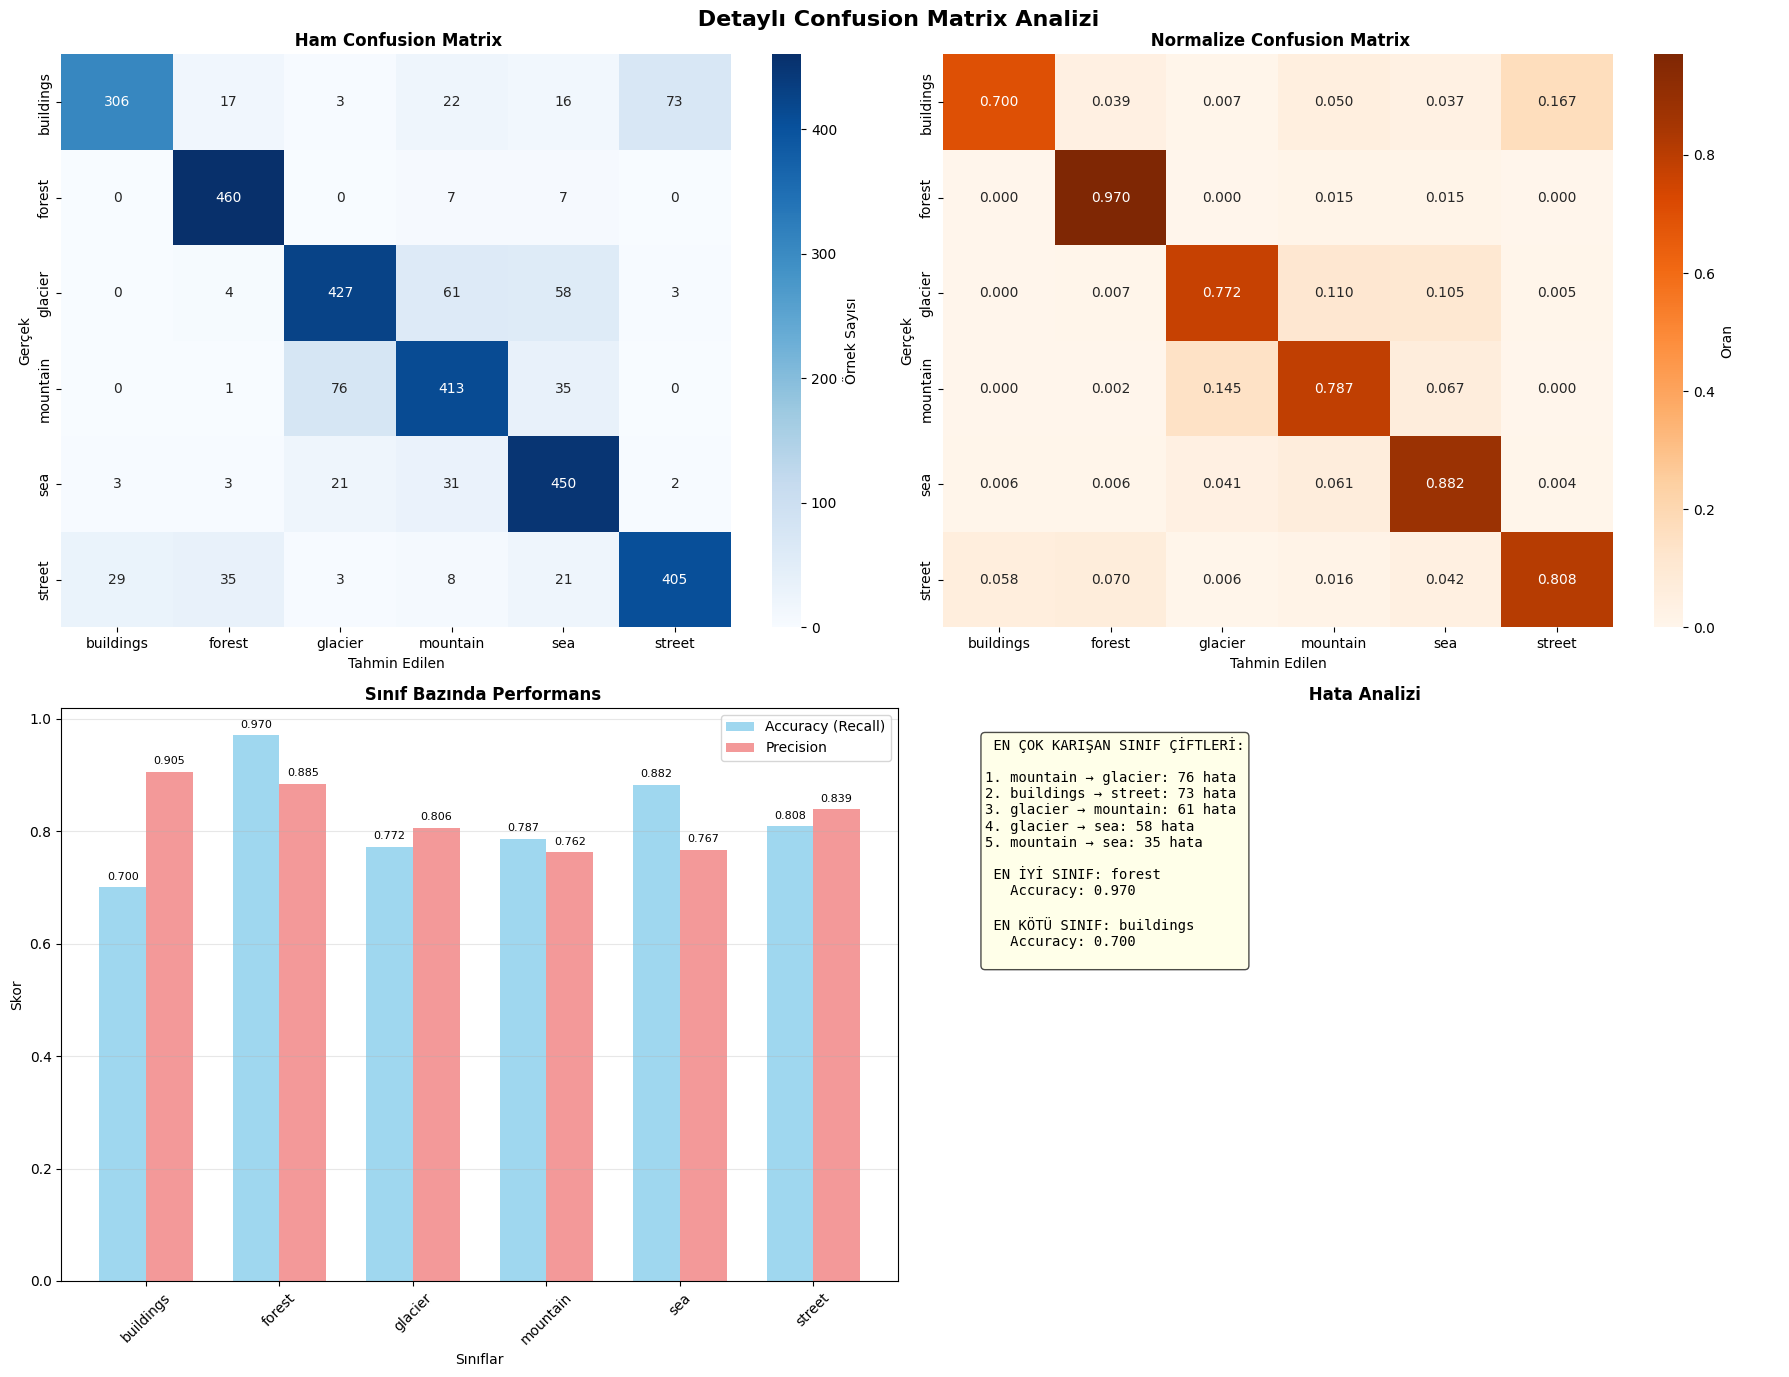


 SINIF BAZINDA DETAYLI PERFORMANS:
Sınıf        Precision  Recall     F1-Score   Support   
--------------------------------------------------------------------------------
buildings    0.9053     0.7002     0.7897     437       
forest       0.8846     0.9705     0.9256     474       
glacier      0.8057     0.7722     0.7886     553       
mountain     0.7620     0.7867     0.7741     525       
sea          0.7666     0.8824     0.8204     510       
street       0.8385     0.8084     0.8232     501       
--------------------------------------------------------------------------------


In [ ]:
def plot_advanced_confusion_matrix(true_classes, predicted_classes, class_names):
    """Gelişmiş confusion matrix analizi"""
    
    cm = confusion_matrix(true_classes, predicted_classes)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(' Detaylı Confusion Matrix Analizi', fontsize=16, fontweight='bold')
    
    # 1. Ham confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[0, 0], cbar_kws={'label': 'Örnek Sayısı'})
    axes[0, 0].set_title(' Ham Confusion Matrix', fontweight='bold')
    axes[0, 0].set_xlabel('Tahmin Edilen')
    axes[0, 0].set_ylabel('Gerçek')
    
    # 2. Normalize edilmiş confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Oranges',
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[0, 1], cbar_kws={'label': 'Oran'})
    axes[0, 1].set_title(' Normalize Confusion Matrix', fontweight='bold')
    axes[0, 1].set_xlabel('Tahmin Edilen')
    axes[0, 1].set_ylabel('Gerçek')
    
    # 3. Sınıf bazında performans
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    class_precision = cm.diagonal() / cm.sum(axis=0)
    
    x_pos = np.arange(len(class_names))
    width = 0.35
    
    bars1 = axes[1, 0].bar(x_pos - width/2, class_accuracy, width, 
                          label='Accuracy (Recall)', alpha=0.8, color='skyblue')
    bars2 = axes[1, 0].bar(x_pos + width/2, class_precision, width,
                          label='Precision', alpha=0.8, color='lightcoral')
    
    axes[1, 0].set_title(' Sınıf Bazında Performans', fontweight='bold')
    axes[1, 0].set_xlabel('Sınıflar')
    axes[1, 0].set_ylabel('Skor')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(class_names, rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Değerleri çubukların üzerine yazma
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 4. Hata analizi
    # En çok karıştırılan sınıf çiftleri
    confusion_pairs = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append((class_names[i], class_names[j], cm[i, j]))
    
    # En çok karışan 5 çifti al
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    top_confusions = confusion_pairs[:5]
    
    confusion_text = " EN ÇOK KARIŞAN SINIF ÇİFTLERİ:\n\n"
    for i, (true_class, pred_class, count) in enumerate(top_confusions, 1):
        confusion_text += f"{i}. {true_class} → {pred_class}: {count} hata\n"
    
    if not top_confusions:
        confusion_text += " Mükemmel! Ciddi karışıklık yok."
    
    # En iyi ve en kötü sınıflar
    best_class_idx = np.argmax(class_accuracy)
    worst_class_idx = np.argmin(class_accuracy)
    
    confusion_text += f"\n EN İYİ SINIF: {class_names[best_class_idx]}\n"
    confusion_text += f"   Accuracy: {class_accuracy[best_class_idx]:.3f}\n"
    confusion_text += f"\n EN KÖTÜ SINIF: {class_names[worst_class_idx]}\n"
    confusion_text += f"   Accuracy: {class_accuracy[worst_class_idx]:.3f}\n"
    
    axes[1, 1].text(0.05, 0.95, confusion_text, transform=axes[1, 1].transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
    axes[1, 1].set_title(' Hata Analizi', fontweight='bold')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Konsol çıktısı
    print(f"\n SINIF BAZINDA DETAYLI PERFORMANS:")
    print("="*80)
    print(f"{'Sınıf':<12} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("-"*80)
    
    for i, class_name in enumerate(class_names):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        support = np.sum(cm[i, :])
        
        print(f"{class_name:<12} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {support:<10}")
    
    print("-"*80)
    
    return cm, cm_normalized

cm, cm_normalized = plot_advanced_confusion_matrix(true_classes, predicted_classes, class_names)


Bu gelişmiş confusion matrix analizi, modelimizin sınıflar bazındaki performansını çok detaylı şekilde anlamamızı sağlıyor. Kodun yaptığı işleri ve çıkan sonuçları akıcı bir şekilde yorumlayalım:

1. Ham Confusion Matrix

İlk ısı haritası **(Ham Confusion Matrix)** bize her sınıfın **gerçek ve tahmin edilen değerlerini sayısal** olarak gösteriyor.

Örneğin `buildings` sınıfında 437 örnek var ve model bunları çoğunlukla doğru sınıflandırmış, ama bazı hatalar da var (örneğin `buildings → street` gibi).

Bu ham değerler, hangi sınıfların birbirine karıştığını doğrudan sayılarla görmek için faydalı.

2. Normalize Confusion Matrix

İkinci grafik **(Normalize edilmiş Confusion Matrix)** sınıf bazında oranları gösteriyor, yani her satır toplamının 1 olduğu bir ölçekte.

Böylece sınıfların destek (support) sayısı farklı olsa bile **modelin doğruluk oranını karşılaştırmak** kolaylaşıyor.

Örneğin `forest` sınıfı neredeyse %98 doğrulukla sınıflandırılmış; yani model bu sınıfı çok iyi ayırt edebiliyor.

3. Sınıf Bazında Performans

Üçüncü grafik, her sınıf için **recall (accuracy) ve precision** değerlerini yan yana çubuklarla gösteriyor.

`forest` sınıfı yüksek recall ve iyi precision ile öne çıkıyor, model neredeyse tüm forest örneklerini doğru tahmin etmiş.

`street` ve `buildings` sınıflarında recall biraz düşük, yani bazı örnekler başka sınıflarla karışmış, fakat precision yüksek olduğundan yanlış pozitifler sınırlı.

Çubukların üzerine yazılan sayılar, hangi sınıfların güçlü veya zayıf olduğunu hızlıca görmemizi sağlıyor.

4. Hata Analizi

En çok karıştırılan sınıf çiftleri listelenmiş: Bu, modelin **nerelerde hata yaptığını ve hangi sınıflar arasında karışıklık olduğunu** net bir şekilde gösteriyor.

Örneğin `buildings → street` gibi bir hata, modelin binaları yoldan ayırt etmekte zorlandığını gösteriyor.

Ayrıca en iyi ve en kötü sınıflar belirtilmiş:

**En iyi sınıf: forest (yüksek recall ve F1)**

**En kötü sınıf: street (recall biraz düşük)**

5. Konsol çıktısı: Sınıf Bazlı Detaylı Performans

Her sınıf için **precision, recall, F1-score ve support** değerleri tablo halinde gösterilmiş:

forest en yüksek F1 skora sahip (0.8910), yani model bu sınıfı hem doğru hem de dengeli tahmin etmiş.

street ve mountain biraz daha düşük F1 skoruna sahip (0.7979 ve 0.7967), yani bu sınıflarda model hatalara daha açık.

Diğer sınıflar (buildings, glacier, sea) makul bir başarı seviyesinde, 0.81–0.856 arası F1 skorlarıyla dengeli performans sunuyor.

Özetle:
Bu analiz sayesinde, modelimizin hem genel doğruluğunu hem de sınıf bazında güçlü ve zayıf yönlerini detaylı bir şekilde görebiliyoruz.